# Exercise: Preprocessing

1. Data
1. EDA
1. Missing value Exploration
1. Preprocessing
1. Data Splitting
1. Data Transformation
1. Model fitting and evaluation
1. Model properties

**Data**

An individual’s annual income results from various factors. 
Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc.
<br>

Fields:
<br>
The dataset contains 16 columns
<br>
Target filed: Income
<br>
- The income is divide into two classes: 50K
<br>
Number of attributes: 14
<br>
- These are the demographics and other 
<br>
features to describe a person

<br>
drop columns: 'fnlwgt', 'education'

We will explore the possibility in predicting income level based on the individual’s personal information.

**Preprocess scheme:**
1. one hot encoding : relationship, race, sex
1. binary encoding : workclass, marital status, occupation, native country  
1. ordinal encoding : education (already encoded)
1. no treatment : size


In [255]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import category_encoders as ce

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [256]:
df_adult = pd.read_csv('adult.csv')
df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [317]:
# df_adult['capital.gain'].value_counts()

In [257]:
df_adult['income'] = np.where(df_adult['income']=='>50K',1,0)

In [258]:
df_adult.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [259]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


## Missing Value

Missing value in this dataset marked with "?"

In [260]:
df_adult.replace('?', np.nan, inplace = True)

In [261]:
df_adult.isnull().sum()/df_adult.shape[0] * 100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

<AxesSubplot:>

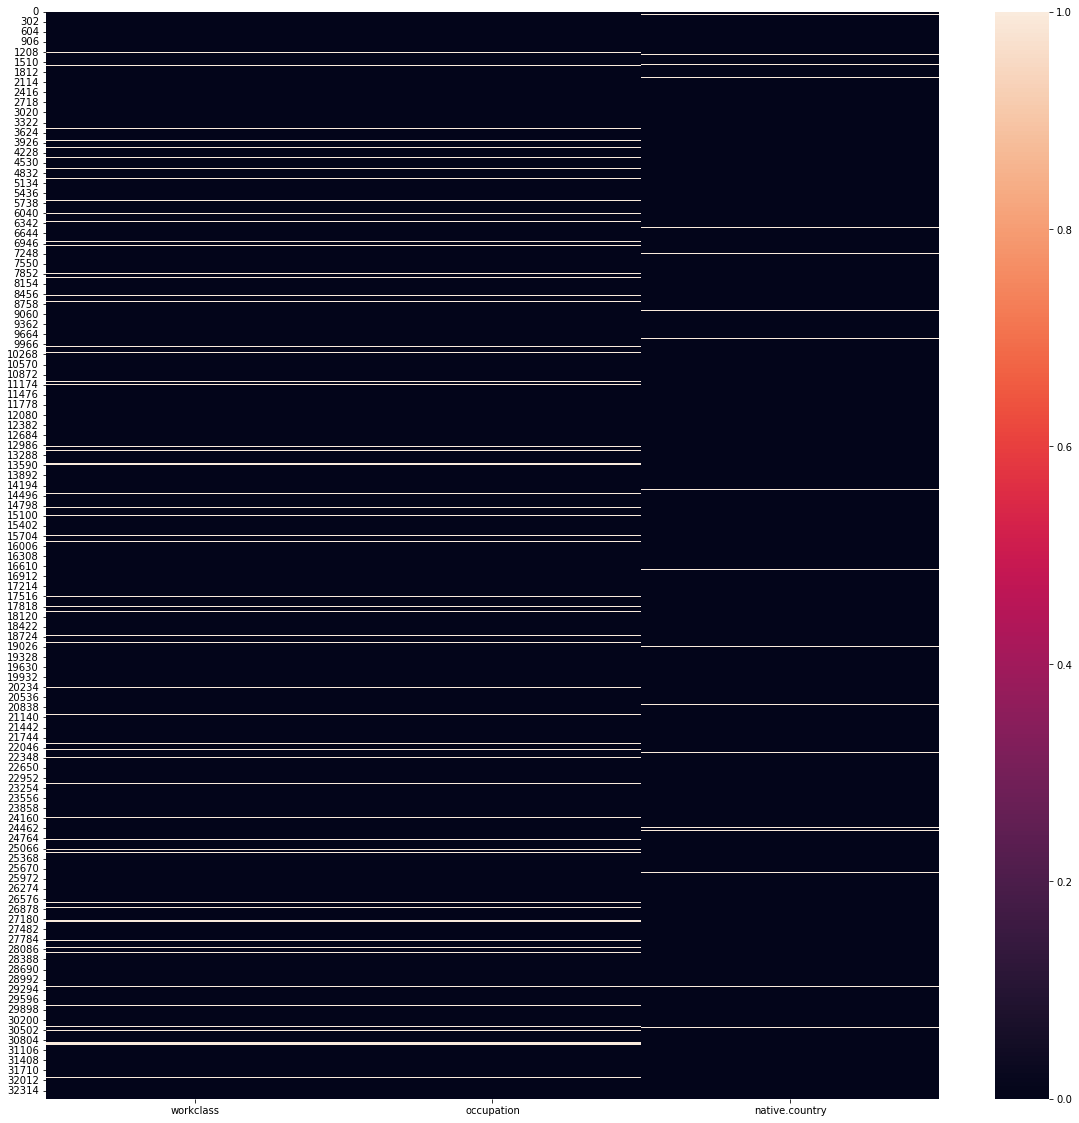

In [262]:
plt.figure(figsize = (20,20))
sns.heatmap(df_adult[['workclass','occupation','native.country']].isnull())

The Missing Variable:
1. workclass
1. occupation
1. native.country

## Data Splitting

In [263]:
# define fetures and target
X = df_adult.drop(columns = ['fnlwgt','income','education'])
y = df_adult['income']

In [264]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=10, test_size=0.2)

## Preprocessing

In [265]:
df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [266]:
df_adult.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [267]:
df_adult.describe(include='object') 

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,30725,32561,32561,30718,32561,32561,32561,31978
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,22696,10501,14976,4140,13193,27816,21790,29170


Preprocess scheme:
1. one hot encoding : relationship, race, sex
1. binary encoding : workclass, marital status, occupation, native country  
1. ordinal encoding : education (already encoded)
1. no treatment : size

In [268]:
# pipeline untuk kolom-kolom binary encoder
imp_binary = Pipeline([
    ('imputer',SimpleImputer(strategy = 'constant', fill_value = 'NC')),
    ('binary encoder',ce.BinaryEncoder())
])

transformer = ColumnTransformer([
    ('one hot encoder', OneHotEncoder(), ['relationship','race','sex']),
    ('binary encoder', imp_binary, ['workclass','marital.status','occupation','native.country'])
], remainder = 'passthrough')

## Data Transformation

In [269]:
X_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1609,39,Private,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,55,United-States
30190,53,Private,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States
12039,42,Self-emp-inc,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,43,United-States
24687,32,Private,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States
19237,49,Private,4,Widowed,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States


In [275]:
# define discretizer
discretizer = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy='uniform')

# fitting
discretizer.fit(X_train[['age']])

# transform
X_train['age'] = discretizer.transform(X_train[['age']])
X_test['age'] = discretizer.transform(X_test[['age']])


In [276]:
X_train.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1609,2.0,Private,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,55,United-States
30190,3.0,Private,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States
12039,2.0,Self-emp-inc,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,43,United-States
24687,1.0,Private,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States
19237,3.0,Private,4,Widowed,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States


In [279]:
# Column Transformer
X_train_prep = transformer.fit_transform(X_train)
X_test_prep = transformer.transform(X_test)

X_train_prep = pd.DataFrame(X_train_prep)
X_test_prep = pd.DataFrame(X_test_prep)

X_train_prep.head()

C:\Users\LENOVO\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,16.0,99999.0,0.0,55.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,10.0,0.0,0.0,55.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,9.0,0.0,0.0,43.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,13.0,0.0,0.0,50.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,4.0,0.0,0.0,40.0


In [280]:
feat_onehot = list(transformer.transformers_[0][1].get_feature_names_out())
# feat_onehot

In [281]:
feat_binary = list(transformer.transformers_[1][1]['binary encoder'].get_feature_names())
# feat_binary 

In [282]:
feat_numerical = list(X_train.columns[transformer.transformers_[2][2]])
# feat_numerical

In [283]:
# menyatukan nama-nama kolom
features = feat_onehot + feat_binary + feat_numerical

X_train_prep.columns = features
X_test_prep.columns = features
X_train_prep

,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,...,3_2,3_3,3_4,3_5,3_6,age,education.num,capital.gain,capital.loss,hours.per.week
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,16.0,99999.0,0.0,55.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,10.0,0.0,0.0,55.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,9.0,0.0,0.0,43.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,13.0,0.0,0.0,50.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,4.0,0.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26043,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3.0,15.0,3325.0,0.0,40.0
26044,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,4.0,11.0,0.0,0.0,40.0
26045,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,10.0,0.0,0.0,30.0
26046,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,2.0,13.0,0.0,0.0,40.0


In [284]:
# Polynomial Features
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(X_train_prep)
X_test_poly = poly.transform(X_test_prep)

# X_train_poly

In [285]:
X_train_poly = pd.DataFrame(X_train_poly)
X_test_poly = pd.DataFrame(X_test_poly)

X_test_poly

,0,1,2,3,4,5,6,7,8,9,...,810,811,812,813,814,815,816,817,818,819
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,0.0,0.0,550.0,0.0,0.0,0.0,0.0,0.0,3025.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,2500.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81.0,0.0,0.0,360.0,0.0,0.0,0.0,0.0,0.0,1600.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,81.0,0.0,0.0,540.0,0.0,0.0,0.0,0.0,0.0,3600.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81.0,0.0,0.0,360.0,0.0,0.0,0.0,0.0,0.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,100.0,0.0,0.0,400.0,0.0,0.0,0.0,0.0,0.0,1600.0
6509,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,144.0,92256.0,0.0,600.0,59105344.0,0.0,384400.0,0.0,0.0,2500.0
6510,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,169.0,0.0,0.0,520.0,0.0,0.0,0.0,0.0,0.0,1600.0
6511,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.0,0.0,0.0,140.0,0.0,0.0,0.0,0.0,0.0,400.0


In [286]:
X_train_poly.columns = poly.get_feature_names_out()
X_test_poly.columns = poly.get_feature_names_out()

X_train_poly.head()

,1,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,...,education.num^2,education.num capital.gain,education.num capital.loss,education.num hours.per.week,capital.gain^2,capital.gain capital.loss,capital.gain hours.per.week,capital.loss^2,capital.loss hours.per.week,hours.per.week^2
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,256.0,1599984.0,0.0,880.0,9.999800e+09,0.0,5499945.0,0.0,0.0,3025.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,0.0,0.0,550.0,0.000000e+00,0.0,0.0,0.0,0.0,3025.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,81.0,0.0,0.0,387.0,0.000000e+00,0.0,0.0,0.0,0.0,1849.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,169.0,0.0,0.0,650.0,0.000000e+00,0.0,0.0,0.0,0.0,2500.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,0.0,0.0,160.0,0.000000e+00,0.0,0.0,0.0,0.0,1600.0


## Model Fitting and evaluation

In [287]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)
print('accuracy:',accuracy_score(y_test, y_pred))

accuracy: 0.8387839705204975


## Model Properties

In [288]:
importance_table = pd.DataFrame({
    'imp':model.feature_importances_
}, index = X_train_poly.columns).sort_values('imp', ascending=False)

importance_table.head(10)

,imp
relationship_Husband education.num,0.569186
capital.gain,0.213610
1_2,0.079581
sex_Male capital.gain,0.076604
education.num hours.per.week,0.060423
2_1 capital.gain,0.000597
1,0.000000
0_3 2_0,0.000000
0_2 hours.per.week,0.000000
0_3^2,0.000000


<AxesSubplot:>

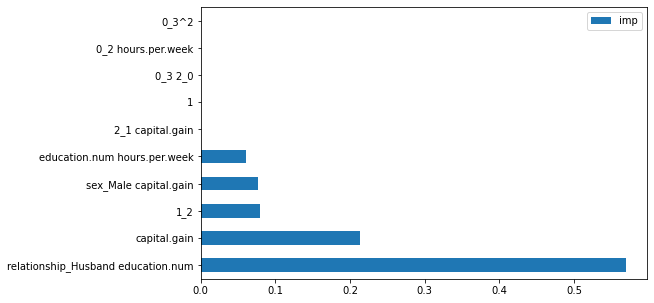

In [289]:
importance_table.head(10).plot(kind = 'barh', figsize = (8,5))

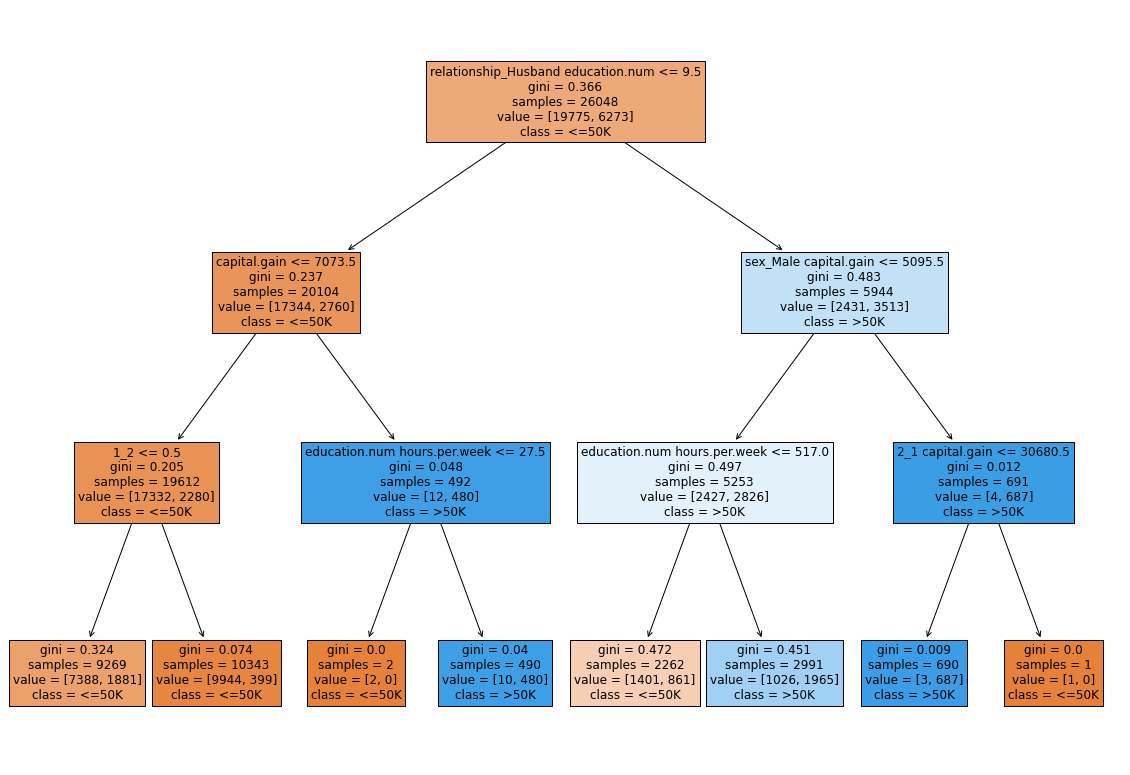

In [290]:
plt.figure(figsize = (20,14))
plot_tree(model, feature_names=X_train_poly.columns, filled = True, class_names = ['<=50K','>50K'], fontsize=12)
plt.show()